<img src='https://drive.google.com/uc?export=download&id=1ma7j_2Pn7HG8hlhxUmKk5ZeWVqYJ6OnU' width="800" height ="" />



## **Fastcampus 마케팅 분석**

Fastcampus 판매 데이터를 통해 어느 콘텐츠(강의)가 잘 팔리는지, 

금액과 판매 시기에 대한 분석을 통해 마케팅 전략을 세우기

### **Fastcampus 데이터 설명**
- Fastcampus의 거래 내역들의 정보를 담고 있는 데이터이다. 
- 많은 데이터들이 공유가 불가해서 전처리 과정을 거쳐야 한다. 

**Columns 정보**
- id : 해당 거래내역에 대한 ID (PK)		
- customer_id : 결제한 고객 ID		
- course_id : 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다
- type : 거래의 종류		
- state : 거래에 대한 상태		
- course_title :강의 제목		
- category_title : 대분류		
- format : 온라인 강의의 기획 종류		
- completed_at : state가 COMPLETED로 변경된 시점, 결제완료가 된 시점		
- transaction_amount : 최종 결제 금액		
- coupon_title : 쿠폰 종류		
- coupon_discount_amount : 쿠폰 할인 금액		
- sale_price : 판매 금액	
- tax_free_amount : 보안상 공유가 힘든 column이기에 삭제 		
- pg : PG사 종류		
- method : 결제 방식		
- subcategory_title : 중분류		
- marketing_start_at : 강의 판매 시점

**사용가능한 정보들**
- type 
  - payment : 결제
  - refund : 환불
- state 
  - COMPLETED : 결제 완료 
  - REQUESTED : 고객에게 결제 요청 


## **데이터와 라이브러리 불러오기** 

In [ ]:
# 한글폰트를 사용하기 위해 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates
import datetime
import warnings

%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/5. Others/오프라인 1조/파이널프로젝트_RAW_210329_210926.xlsx")
# csv파일 만들기
df.to_csv('/content/drive/MyDrive/Colab Notebooks/5. Others/오프라인 1조/FastCampus_data.csv', index=False)

In [ ]:
# 불러올때 속도가 더 빠른 csv파일 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5. Others/오프라인 1조/FastCampus_data.csv')

## **데이터 전처리**

- 우선 결제완료가된 사람들을 주로 분석을 하기로 했습니다.
- state가 COMPLETED이고 type이 PAYMENT인 데이터들을 pay 변수에 저장을 하였고 결제가 완료된 사람들의 데이터를 불러왔습니다
- state가 COMPLETED이고 type이 REFUND인 데이터들은 ref 변수에 저장하여 환불을 한 사람들의 데이터를 불러왔습니다

In [ ]:
# 결제가 완료된 사람들
pay = df[(df.state=='COMPLETED')&(df.type=='PAYMENT')]

# 환불이 완료된 사람들
ref = df[(df.state=='COMPLETED')&(df.type=='REFUND')]

### **결측치 처리**

In [ ]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52902 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52902 non-null  float64
 1   customer_id             52902 non-null  float64
 2   course_id               50922 non-null  float64
 3   type                    52902 non-null  object 
 4   state                   52902 non-null  object 
 5   course_title            52901 non-null  object 
 6   category_title          52899 non-null  object 
 7   format                  52901 non-null  object 
 8   completed_at            52902 non-null  object 
 9   transaction_amount      52902 non-null  float64
 10  coupon_title            23761 non-null  object 
 11  coupon_discount_amount  23761 non-null  float64
 12  sale_price              51833 non-null  float64
 13  tax_free_amount         51833 non-null  float64
 14  pg                      43030 non-nul

In [ ]:
pay.isna().sum()

id                            0
customer_id                   0
course_id                  1980
type                          0
state                         0
course_title                  1
category_title                3
format                        1
completed_at                  0
transaction_amount            0
coupon_title              29141
coupon_discount_amount    29141
sale_price                 1069
tax_free_amount            1069
pg                         9872
method                        0
subcategory_title          9435
marketing_start_at         9344
dtype: int64

In [ ]:
## 결측치 처리

# 보안상의 이유로 공개불가한 column이라 삭제
pay = pay.drop('tax_free_amount', 1)

# coupon_title이 빈상태인 사람들을 쿠폰을 사용안한것으로 간주하여 '사용안함'을 채워넣음
pay['coupon_title'].fillna('사용안함', inplace=True)

# coupon_discount_amount가 비어있는 사람들을 사용안한것으로 간주하여 0.0을 채워넣음
pay['coupon_discount_amount'].fillna(0.0,inplace=True)

# pg가 비어있는 사람들을 다른 결제 방법으로 결제 한것으로 간주하여 'ETC'를 채워넣음
pay['pg'].fillna('ETC', inplace=True)

# 빈 데이터가 너무 많아서 삭제 id=117129
pay.drop(index=47361, axis=0, inplace=True)

# sale_price가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['sale_price'].replace('', np.nan, inplace=True)
pay.dropna(subset=['course_id'], inplace=True)

# course_id가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['course_id'].replace('', np.nan, inplace=True)
pay.dropna(subset=['sale_price'],inplace=True)

# 카테고리가 없는것으로 간주해서 '해당없음'으로 채워넣음
pay['category_title'].fillna('해당없음', inplace=True)

# transcation_amount가 0, sale_price값이 1 인 항목들은 전부 셈플 강의거나 테스트용이었으므로 삭제
pay = pay.loc[(pay.sale_price!=1.0)&(pay.transaction_amount!=0)]

In [ ]:
# 서브 카테고리 지정
pay.loc[(pay.course_title.str.contains('영상') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '영상 편집'
pay.loc[(pay.course_title.str.contains('프론트엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('딥러닝') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('모바일앱') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모바일앱'
pay.loc[(pay.course_title.str.contains('개발자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('백엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('인공지능') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('PPT') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('보고서') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('DevOps') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'DevOps'
pay.loc[(pay.course_title.str.contains('UX/UI') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'UX/UI'
pay.loc[(pay.course_title.str.contains('모션그래픽') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모션그래픽'
pay.loc[(pay.course_title.str.contains('업무자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '업무자동화'
pay.loc[(pay.course_title.str.contains('SNS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'SNS마케팅'
pay.loc[(pay.course_title.str.contains('디지털 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('그로스 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('데이터 기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 한끝세트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 백과사전') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('풀스택 마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('개인화 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('B2B') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'B2B'
pay.loc[(pay.course_title.str.contains('마케팅 벼락치기') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('게임개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 제작') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('모델링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('부동산 투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 디벨로퍼') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('부동산 재테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('엑셀') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '엑셀/VBA'
pay.loc[(pay.course_title.str.contains('데이터분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('시각디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '시각디자인'
pay.loc[(pay.course_title.str.contains('재무제표') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('자금조달') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('금융ㆍ투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('재무/세무') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('회계') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('포토샵&일러스트레이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('일러스트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '일러스트'
pay.loc[(pay.course_title.str.contains('VFX') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'VFX'
pay.loc[(pay.course_title.str.contains('웹 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('컴퓨터 공학') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('투자의 정석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('마스터 코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('기업분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('클론코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('ADsP') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('풀스택 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('개발 풀스택') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('웹 프로그래밍') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('리팩터링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '마케터'
pay.loc[(pay.course_title.str.contains('SQL') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('HTML/CSS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('코딩+알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('자연어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('앱개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬 자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('비즈니스 영어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('스피치 10분컷') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Financial Modeling') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Spring') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터베이스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('객체지향') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('React') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터 분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('빅데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('금융/투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('기업투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[pay.subcategory_title.isnull(),'subcategory_title'] = '기타'

In [ ]:
# index 재정렬
pay.reset_index(inplace=True)
ref.reset_index(inplace=True)

In [ ]:
pay.isna().sum()

index                        0
id                           0
customer_id                  0
course_id                    0
type                         0
state                        0
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                           0
method                       0
subcategory_title            0
marketing_start_at        5302
dtype: int64

## **데이터 분석**

### 콘텐츠 기획 분석

* 사람들은 어떤 콘텐츠를 많이 구매할까? : 카테고리, 서브카테고리, 포맷
* 마케팅 효과가 있는가? 
* 특정 그룹의 상품이 효과가 있는가?

#### 카테고리 분석

In [ ]:
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠'],
      dtype=object)

In [ ]:
pd.DataFrame(pay['category_title'].value_counts())

,category_title
프로그래밍,14302
업무 생산성,6130
데이터사이언스,5881
디자인,5386
영상/3D,4860
마케팅,4241
부동산/금융,2574
투자/재테크,1357
크리에이티브,321
교육,49


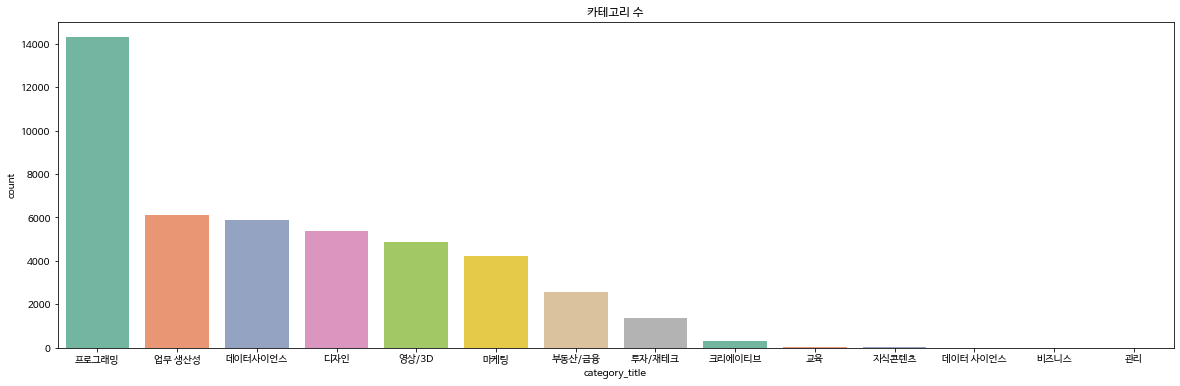

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=pay, x='category_title', order = pay['category_title'].value_counts().index, palette='Set2')
plt.title('카테고리 수')
plt.show()

카테고리를 분석해봤을때 프로그래밍 과목을 수강하는 사람들이 압도적으로 많은걸 볼 수 있다 

In [ ]:
# '데이터사이언스'가 아닌 '데이터 사이언스' 카테고리 체크 
# 관리자가 공백을 붙여서 따로 분류되는걸로 예상 
pay[pay['category_title']=='데이터 사이언스']

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
17165,47407,1117146.0,4340.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 18:26:18,310000.0,사용안함,0.0,310000.0,PAYCO,CARD,데이터분석,2021-05-21 00:00:00
17179,47448,1117311.0,549527.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:17:25,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21 00:00:00
17185,47462,1117346.0,274620.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:32:30,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21 00:00:00
17188,47477,1117420.0,550126.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 21:06:23,310000.0,사용안함,0.0,310000.0,KAKAO,POINT,데이터분석,2021-05-21 00:00:00
17193,47509,1117539.0,238166.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 22:31:51,310000.0,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21 00:00:00


In [ ]:
pay[pay['course_title'].str.contains('SQL 100제')].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
3009,7871,992871.0,474939.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-05 12:22:59,390000.0,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05 00:00:00
3122,8223,993961.0,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 00:22:22,390000.0,사용안함,0.0,390000.0,ETC,CARD,데이터분석,2021-04-05 00:00:00
3156,8320,994302.0,389482.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-06 11:18:22,312000.0,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,ETC,CARD,데이터분석,2021-04-05 00:00:00
3685,9728,998971.0,15551.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-08 17:45:58,312000.0,[20% 할인] 완주반 1주년 기념 쿠폰,78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05 00:00:00
3843,10157,1000599.0,488865.0,204622.0,PAYMENT,COMPLETED,SQL 100제 + 자격증 완성 온라인 완주반 5기,데이터사이언스,온라인 완주반,2021-04-09 13:20:03,312000.0,[완주반 1주년 기념 20% 할인 쿠폰],78000.0,390000.0,INICIS,CARD,데이터분석,2021-04-05 00:00:00


같은 course_title에 '데이터사이언스' 카테고리를 가진 과목이 있는걸로 봐서 관리자가 category_title을 잘못 입력하는 실수를 했다고 보여진다

In [ ]:
# category title이 '데이터 사이언스'인것들을 '데이터사이언스'로 수정
pay.loc[pay['category_title']=='데이터 사이언스' , 'category_title'] = '데이터사이언스'

In [ ]:
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '비즈니스', '지식콘텐츠'], dtype=object)

#### 서브 카테고리 분석

In [ ]:
pay['subcategory_title'].unique()

array(['프론트엔드 개발', 'PPT/보고서', '영상 편집', '회계/재무/세무', 'DevOps', 'UX/UI',
       '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅', '데이터분석', '디지털마케팅',
       '엑셀/VBA', '모바일앱', '업무자동화', 'SNS마케팅', '백엔드 개발', '게임', '개발자 커리어',
       '부동산 개발', '시각디자인', '데이터마케팅', '디자인툴', '금융/투자 실무', '코딩 입문', '기타',
       '커뮤니케이션', '부동산 투자', 'B2B', '리더십', '일러스트', '주식 투자', '마케터', '게임 그래픽',
       '데이터엔지니어링', 'VFX'], dtype=object)

In [ ]:
pd.DataFrame(pay['subcategory_title'].value_counts())

,subcategory_title
영상 편집,3417
프론트엔드 개발,3136
개발자 커리어,3117
백엔드 개발,2984
데이터분석,2482
엑셀/VBA,2286
딥러닝/인공지능,2266
PPT/보고서,2140
디자인툴,1865
모바일앱,1697


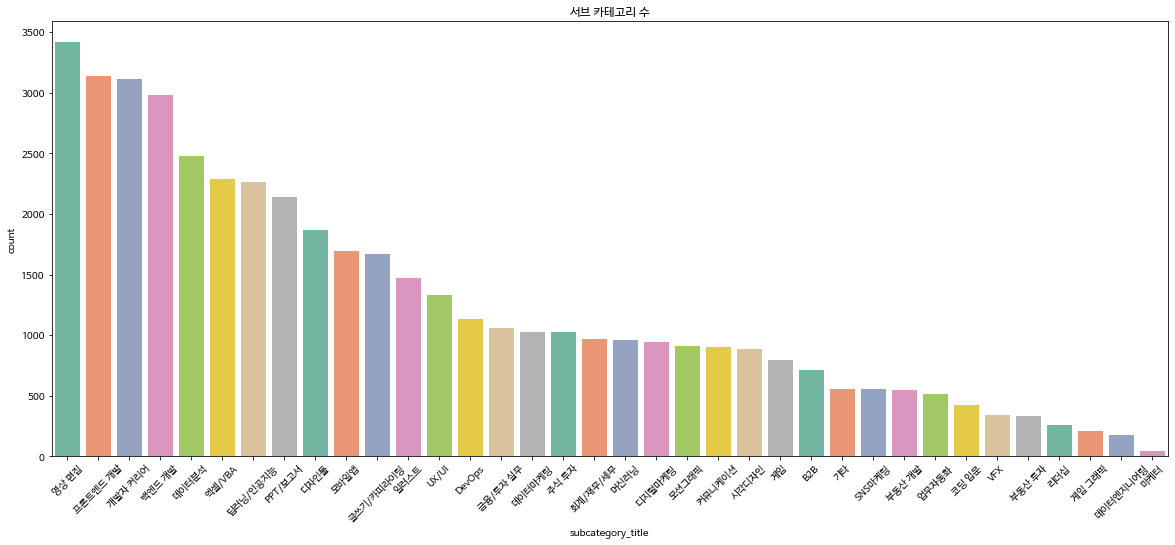

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=pay, x='subcategory_title', order = pay['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('서브 카테고리 수')
plt.show()

서브 카테고리를 분석 해봤을때 영상편집 강의의 수가 제일 많고


그 다음으로 프로그래밍 과목들 (백엔드 개발, 개발자 커리어, 프론트엔드 개발, 딥러닝/인공지능)의 수강수가 많은것으로 분석이 된다

In [ ]:
pd.DataFrame(pay.pivot_table(index=['category_title','subcategory_title'], aggfunc='size'))

0
category_title subcategory_title      
관리             기타                    1
교육             B2B                  49
데이터사이언스        B2B                   1
               데이터분석              2480
               데이터엔지니어링            176
               딥러닝/인공지능           2266
               머신러닝                963
디자인            UX/UI              1244
               디자인툴               1782
               시각디자인               889
               일러스트               1471
마케팅            SNS마케팅              553
               글쓰기/카피라이팅          1668
               기타                    4
               데이터마케팅             1027
               데이터분석                 1
               디지털마케팅              943
               마케터                  45
부동산/금융         개발자 커리어               2
               금융/투자 실무           1058
               부동산 개발              546
               엑셀/VBA                2
               회계/재무/세무            966
비즈니스           기타                    2
               엑셀/VBA                1
               커뮤니케이션                2
업무 생산성         PPT/보고서            2140
               기타                   94
               리더십                 255
               업무자동화               458
               엑셀/VBA             2283
               커뮤니케이션              900
영상/3D          VFX                 339
               게임 그래픽              210
               모션그래픽               902
               영상 편집              3409
지식콘텐츠          기타                   22
크리에이티브         B2B                   2
               UX/UI                83
               기타                  215
               디자인툴                  4
               모션그래픽                 9
               영상 편집                 8
투자/재테크         부동산 투자              333
               주식 투자              1024
프로그래밍          B2B                 660
               DevOps             1130
               개발자 커리어            3115
               게임                  798
               기타                  220
               데이터분석                 1
               디자인툴                 79
               모바일앱               1697
               백엔드 개발             2984
               업무자동화                57
               코딩 입문               425
               프론트엔드 개발           3136

큰 카테고리에서는 프로그래밍을 듣는 사람들이 제일 많은것으로 보이고 서브 카테고리 중에서는 영상/3D의 영상편집을 듣는 사람이 제일 많다

그러므로 프로그래밍 과목들과 영상 편집을 위주로 마케팅을 하면 효과를 볼수 있을것으로 보여진다


#### format 분석

In [ ]:
pay['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '이벤트',
       '하루10분컷', '아카이브', '관리', 'B2B', 'MBA', 'B2G'], dtype=object)

In [ ]:
pd.DataFrame(pay['format'].value_counts())

,format
올인원,38151
RED,3109
온라인 완주반,1350
하루10분컷,1327
B2B,352
스쿨 온라인,328
B2G,310
이벤트,82
B2B 온라인,52
아카이브,31


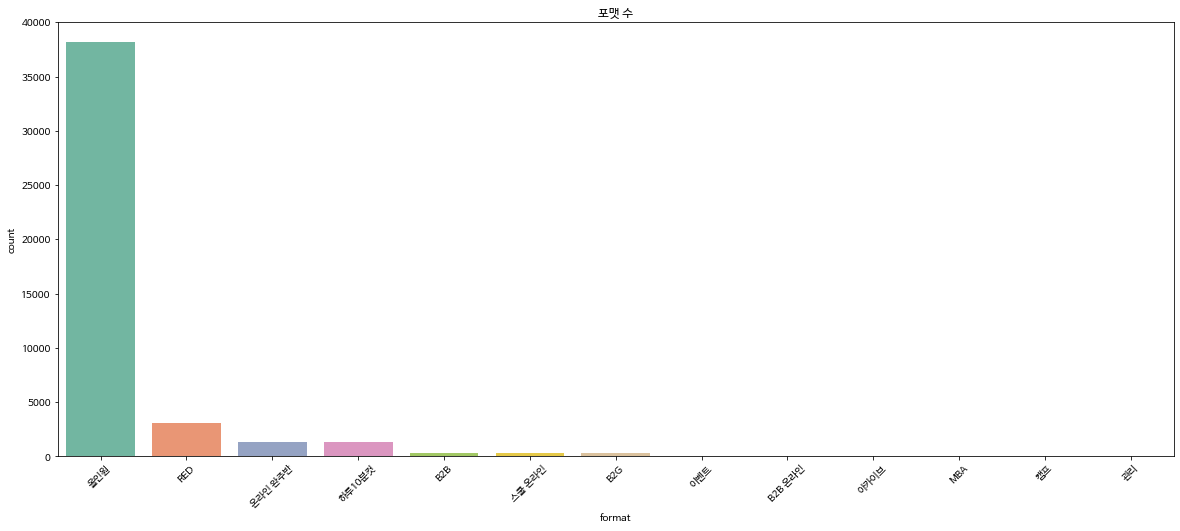

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=pay, x='format', order = pay['format'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('포맷 수')
plt.show()

올인원 format이 압도적으로 많은것으로 보아 사람들은 한번 결제에 여러가지 강의가 들어있는것을 선호하는 타입인것 같다 

마케팅 방향을 올인원을 광고하는것으로 잡아서 하는게 판매율을 높을 수있을것 같다


#### 마케팅의 효과 분석

In [ ]:
# 마케팅이 시작된 시기 분석
pd.DataFrame(pay['marketing_start_at'].dt.strftime('%Y년 %m월').value_counts())

AttributeError: ignored

In [ ]:
# 결제 완료 시간을 월별로 나눠서 분석
pd.DataFrame(pay['completed_at'].dt.strftime('%Y년 %m월').value_counts())

AttributeError: ignored

*   2019년과 2020년에는 마케팅 횟수가 적고 2021년 2월부터 크게 증가해서 4월부터 증가해서 8월까지는 판매수가 많아진걸로 보여진다
*   2021년 9월에는 마케팅 횟수가 현저히 떨어졌기때문에 9월 판매수가 떨어진것으로 보인다

### **시기별 분석**

####결제 시간대 분석

##### 월별 결제량

In [ ]:
pd.DataFrame(pay['completed_at'].dt.strftime('%Y년 %m월').value_counts())

,completed_at
2021년 08월,8435
2021년 05월,7647
2021년 06월,7499
2021년 04월,7435
2021년 07월,7394
2021년 09월,4845
2021년 03월,1879


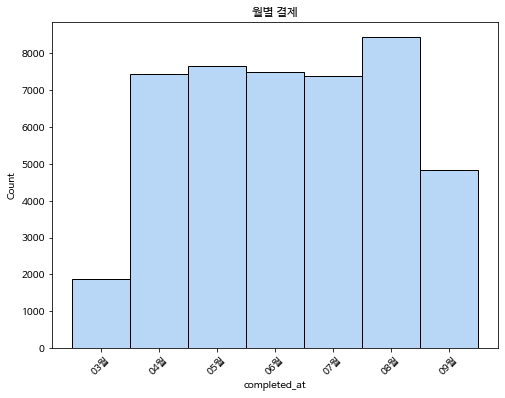

In [ ]:
plt.figure(figsize=(8,6))
sns.set_palette("pastel")
sns.histplot(pay['completed_at'].dt.strftime('%m월'))
plt.xticks(rotation=45)
plt.title('월별 결제')
plt.show()

4월부터 8월까지 결제량이 많았고 3월과 9월에는 마케팅 부족으로 거래량이 적은걸로 예상된다

##### 일별 거래량

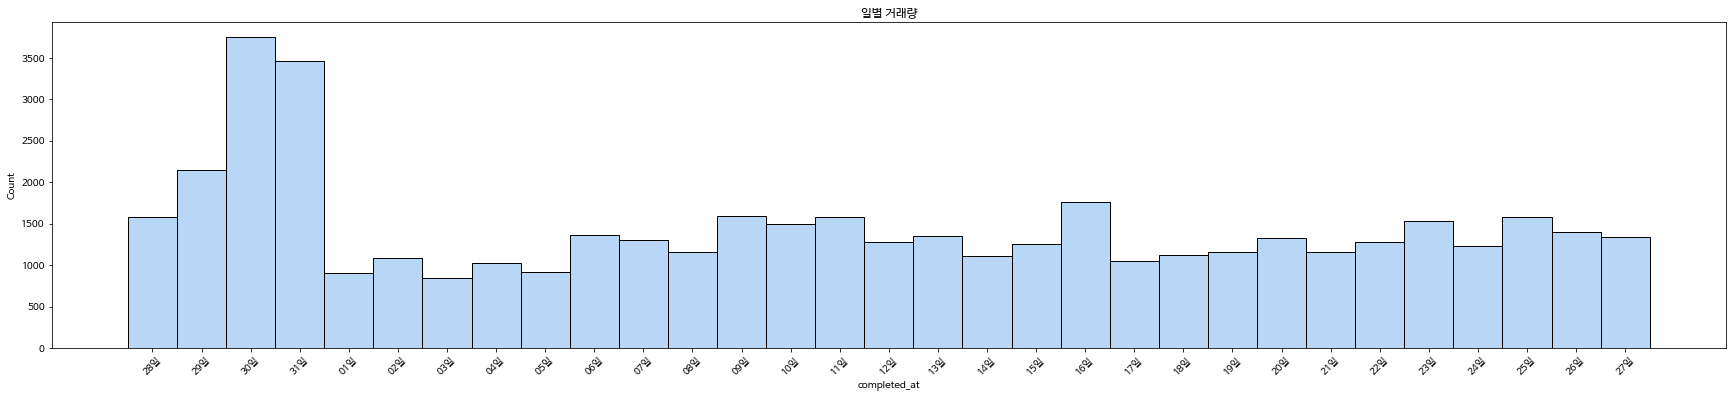

In [ ]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(pay['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('일별 거래량')
plt.show()

28일부터 증가하기 시작해서 월말까지 결제률이 높았다

##### 시간별 결제량

In [ ]:
pd.DataFrame(pay['completed_at'].dt.strftime('%H시').value_counts())

,completed_at
23시,3732
22시,3492
21시,2998
16시,2739
15시,2661
17시,2625
14시,2604
18시,2593
20시,2568
10시,2420


In [ ]:
# 결제된 시간 분포 
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.histplot(pay['completed_at'].dt.strftime('%H시'))
plt.xticks(rotation=45)
plt.title('결제된 시간')
plt.show()

AttributeError: ignored

<Figure size 864x432 with 0 Axes>

결제된 시간의 분포에 따르면 9시에서 11시 사이에 결제가 많이 된것으로 보아 

직장인들이 일을 마치고 퇴근후 결제한것으로 예상을 해볼수 있을 것 같다

#### 환불 시간대 분석

#### 일별 환불량

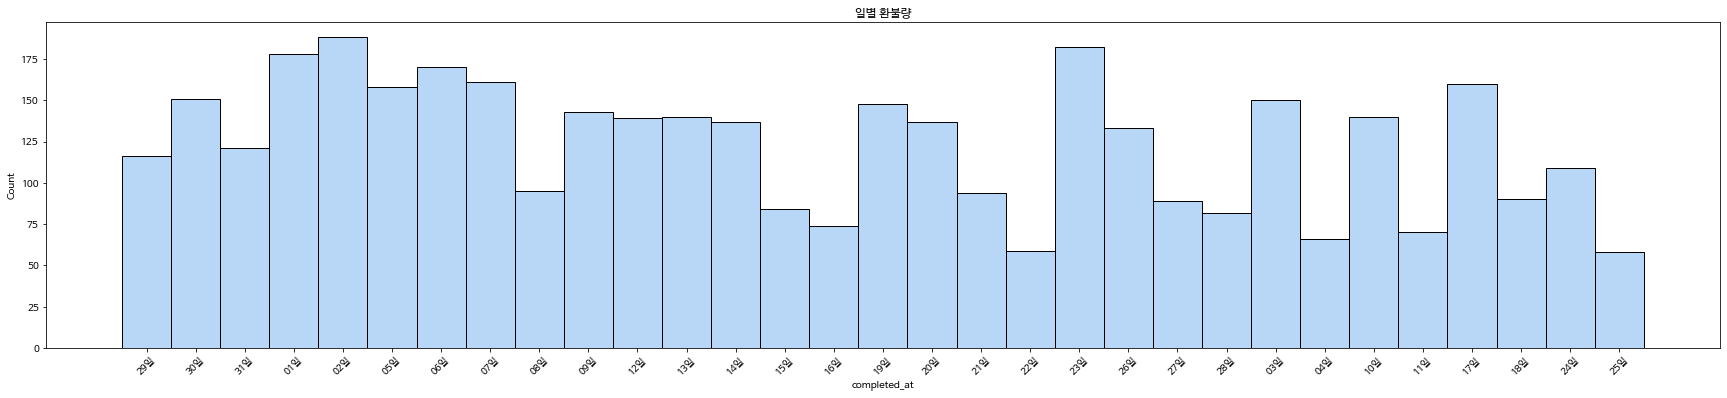

In [ ]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(ref['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('일별 환불량')
plt.show()

일별 환불에서는 뚜렷한 패턴을 찾을수가 없었다

#### 시간별 환불량

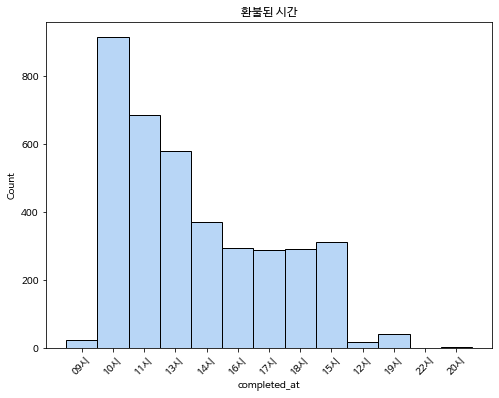

In [ ]:
plt.figure(figsize=(8,6))
sns.set_palette('pastel')
sns.histplot(ref['completed_at'].dt.strftime('%H시'))
plt.xticks(rotation=45)
plt.title('환불된 시간')
plt.show()

환불된 시간을 보면 10시에서 새벽 한시까지 많은 걸로 봐서 
* 9시에서 11시 사이에 결제를 하고 강의를 들어보고 자기한테 맞지 않아 환불을 한것으로 예상된다


### **금액별 분석**

#### Sale price 분석

In [ ]:
pd.DataFrame(pay['sale_price'].groupby(pay['completed_at'].dt.strftime("%m")).mean())

,sale_price
completed_at,
03,135793.241086
04,142924.215198
05,129341.530012
06,137065.502067
07,160061.846091
08,166117.547125
09,182912.198142


금액들이 계속 증가한거로 보여진다

### **강의별 분석**

### 할인을 받아 결제한 사람들의 비율

Initial thought
*   할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다


In [ ]:
print(len(pay[pay['sale_price']!=pay['transaction_amount']]))
print(len(pay[pay['sale_price']==pay['transaction_amount']]))

20346
24788


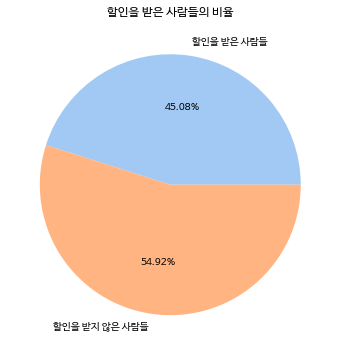

In [ ]:
# 할인을 받은 사람들 
plt.figure(figsize=(8,6))
coupon_usage = [len(pay[pay['sale_price']!=pay['transaction_amount']]), len(pay[pay['sale_price']==pay['transaction_amount']])]
location = ['할인을 받은 사람들','할인을 받지 않은 사람들']
colors = sns.color_palette('pastel')
plt.pie(coupon_usage, labels=location, colors=colors, autopct='%1.2f%%')
plt.title('할인을 받은 사람들의 비율')
plt.show()

할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다라는 예측을 벗어나는것으로 확인

#### 여러개의 강의를 들은 사람

In [ ]:
# id가 같은 중복값 찾기 
dup_id = pay.duplicated(['id'])
dup_id.sum()

0

In [ ]:
# customer_id가 같으면 한사람
dup_cid = pay.duplicated(['customer_id'])
dup_cid.sum()

10379

In [ ]:
# 제일 많이 들은 사람을 찾아보자
pay[pay['customer_id'].duplicated()]['customer_id'].value_counts()

98685.0     47
50769.0     36
40783.0     27
65665.0     25
20784.0     23
            ..
160240.0     1
441566.0     1
566549.0     1
288961.0     1
384003.0     1
Name: customer_id, Length: 6353, dtype: int64

In [ ]:
# 제일 많이 들은 사람을 분석해보자
len(pay[pay['customer_id']==98685.0])

48

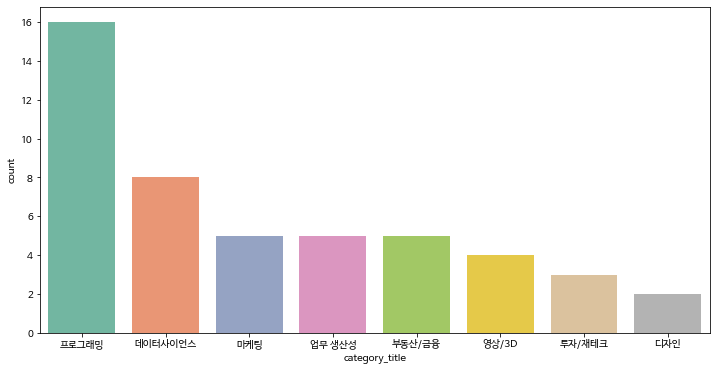

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=pay[pay['customer_id']==98685.0], x='category_title', order = pay[pay['customer_id']==98685.0]['category_title'].value_counts().index, palette='Set2')
plt.show()

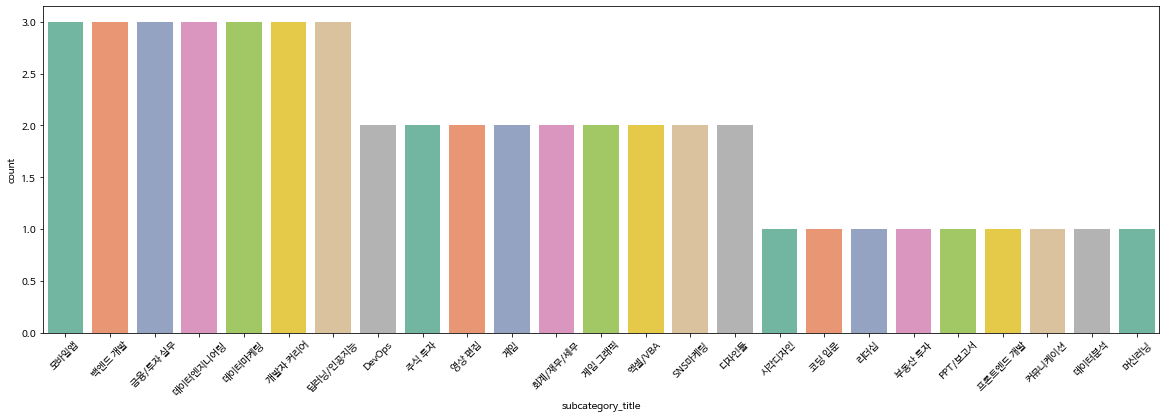

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=pay[pay['customer_id']==98685.0], x='subcategory_title', order = pay[pay['customer_id']==98685.0]['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.show()

프로그래밍 과목들을 제일 많이 듣는것으로 보여진다

In [ ]:
pay[pay['customer_id']==98685.0]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1932,5119,984635.0,98685.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800.0,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,ETC,CARD,모바일앱,2020-01-14
2388,6337,988664.0,98685.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,55300.0,GA4 30% 할인쿠폰,23700.0,79000.0,ETC,CARD,데이터마케팅,2021-04-02
2637,6936,990338.0,98685.0,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100.0,사용안함,0.0,162100.0,ETC,CARD,SNS마케팅,2019-11-11
7910,22014,1037252.0,98685.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300.0,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,INICIS,CARD,디자인툴,2021-04-23
8509,23448,1041392.0,98685.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 09:21:48,19500.0,사용안함,0.0,19500.0,INICIS,CARD,커뮤니케이션,2021-04-28
10252,28280,1054819.0,98685.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 09:33:53,19900.0,사용안함,0.0,19900.0,INICIS,CARD,PPT/보고서,2021-04-28
11982,33455,1069671.0,98685.0,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000.0,[럭키룰렛] 올인원패키지,10000.0,79000.0,INICIS,CARD,백엔드 개발,NaT
18123,50612,1127326.0,98685.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500.0,5월 페이백 프로모션 쿠폰,80000.0,112500.0,INICIS,CARD,DevOps,NaT
18126,50625,1127354.0,98685.0,202698.0,PAYMENT,COMPLETED,합격 패스 : 데이터베이스와 SQLD,프로그래밍,올인원,2021-06-08 11:21:56,79000.0,사용안함,0.0,79000.0,INICIS,CARD,개발자 커리어,2020-05-29
19981,56145,1147494.0,98685.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-06-17 17:37:55,87200.0,[시크릿쿠폰] 유튜브 크리에이터 되기 20% 할인쿠폰,21800.0,109000.0,KAKAO,CARD,영상 편집,2021-06-15


In [ ]:
len(ref[ref['customer_id']==98685.0])

0

환불을 한개도 신청하지 않은거로 보인다

#### 수강생이 많은 과목 분석

In [ ]:
pay['course_id'].value_counts()

203720.0    1398
203178.0    1139
203525.0    1052
204670.0    1050
205080.0     751
            ... 
207116.0       1
205233.0       1
206840.0       1
205171.0       1
207147.0       1
Name: course_id, Length: 353, dtype: int64

코스명 [초격차 패키지 : 한 번에 끝내는 프론트엔드 개발]가 제일 수강생이 많은 과목


In [ ]:
pay[pay['course_id'] == 203720.0].head(1) # 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


In [ ]:
# 월마다 바뀐 판매가격
pd.DataFrame(pay[pay['course_id'] == 203720.0]['sale_price'].groupby(pay['completed_at'].dt.strftime("%m")).median())

,sale_price
completed_at,
03,111000.0
04,113000.0
05,115000.0
06,116000.0
07,136000.0
08,156000.0
09,179000.0


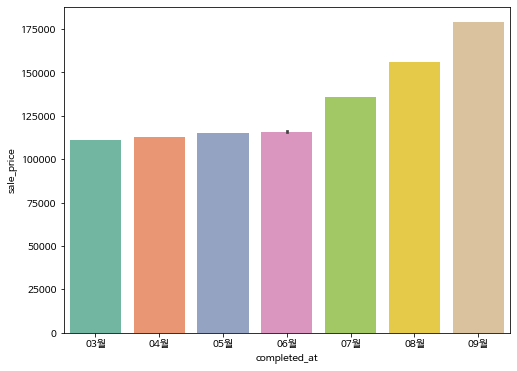

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(pay[pay['course_id'] == 203720.0]['completed_at'].dt.strftime('%m월'), pay[pay['course_id'] == 203720.0]['sale_price'], palette='Set2')
plt.show()

In [ ]:
pd.DataFrame(pay[pay['course_id'] == 203720.0]['completed_at'].dt.strftime('%m').value_counts())

,completed_at
04,329
05,307
06,235
08,199
07,166
09,91
03,71


In [ ]:
pd.DataFrame(pay[pay['course_id'] == 203720.0]['sale_price'].value_counts())

,sale_price
113000.0,329
115000.0,307
116000.0,235
156000.0,199
136000.0,165
179000.0,91
111000.0,71
109000.0,1


3월달에 가격이 제일쌌는데 결제횟수가 적은걸로 봐서 마케팅이 덜되었던 것으로 예상된다


#### 환불율이 높은 강의

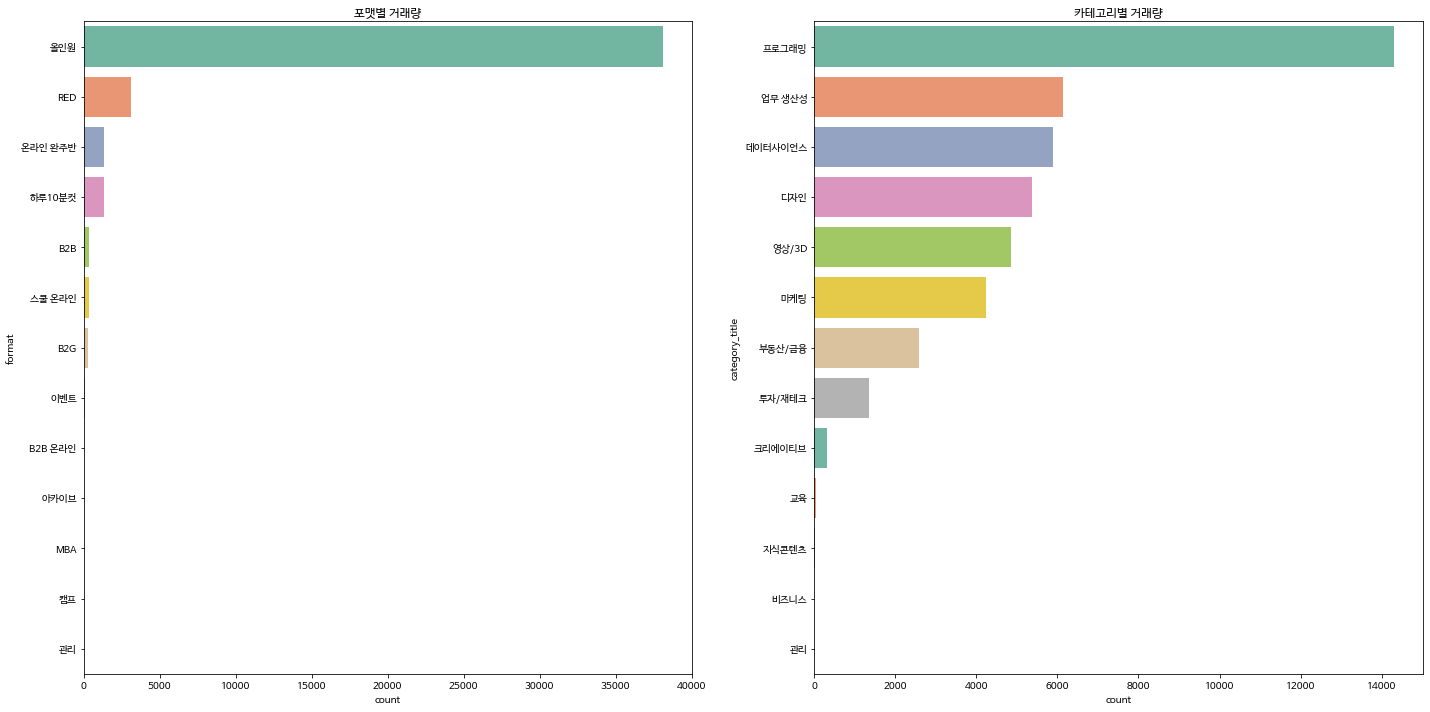

In [ ]:
# 결제 완료된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,12))
plt.rc("font", family="NanumBarunGothic")
plt.subplot(1,2,1)
sns.countplot(data=pay, y='format', order = pay['format'].value_counts().index, palette='Set2')
plt.title('포맷별 거래량')
plt.subplot(1,2,2)
sns.countplot(data=pay, y='category_title', order = pay['category_title'].value_counts().index, palette='Set2')
plt.title('카테고리별 거래량')
plt.show()

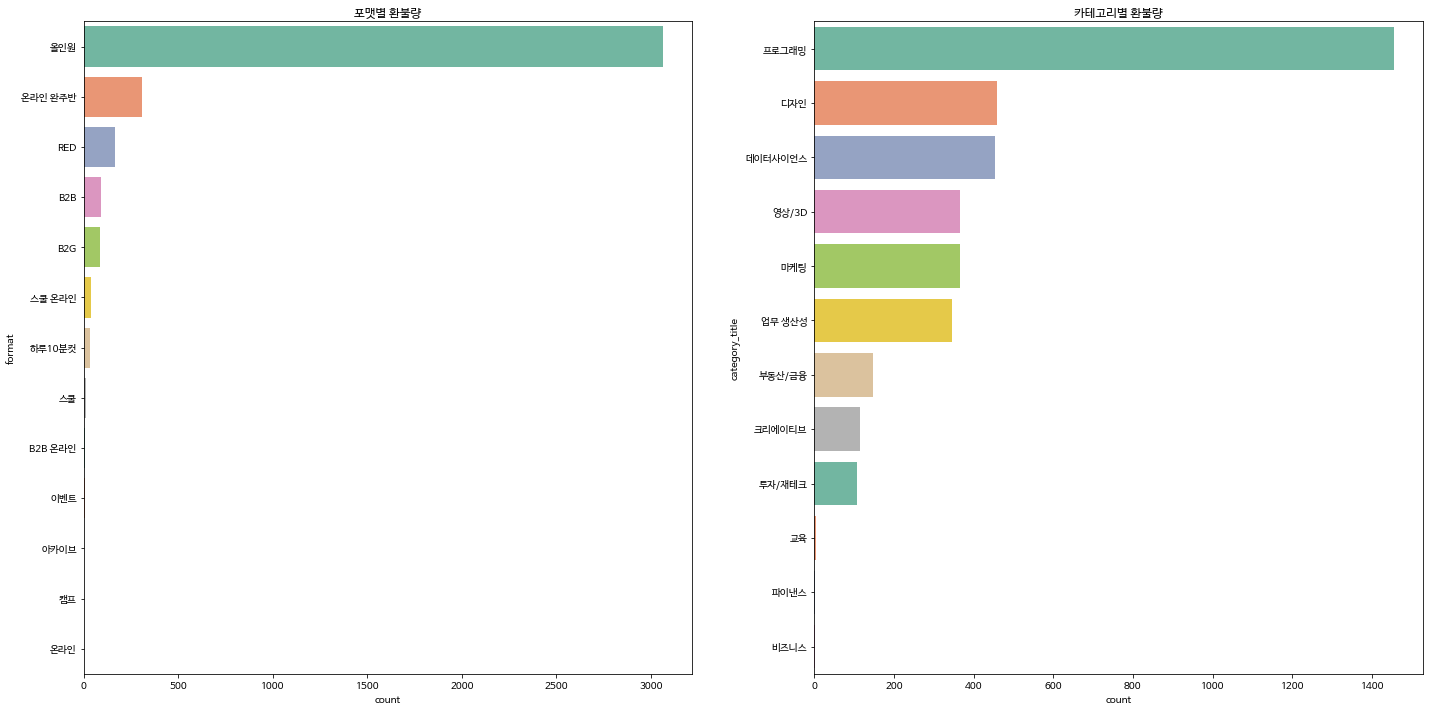

In [ ]:
# 환불된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,12))
plt.rc("font", family="NanumBarunGothic")
plt.subplot(1,2,1)
sns.countplot(data=ref, y='format', order = ref['format'].value_counts().index, palette='Set2')
plt.title('포맷별 환불량')
plt.subplot(1,2,2)
sns.countplot(data=ref, y='category_title', order = ref['category_title'].value_counts().index, palette='Set2')
plt.title('카테고리별 환불량')
plt.show()

결제된 강의의 포맷이 올인원인 강의가 제일 많고, 카테고리에서는 프로그래밍이 제일 많기 때문에 

환불된 강의 중에서 포맷이 올인원인 강의와 카테고리가 프로그래밍인 강의가 제일 많다

#### 환불이 제일 많이 된 강의 분석

In [ ]:
ref['course_id'].value_counts()

203720.0    121
203525.0    105
204631.0     68
204871.0     65
203787.0     64
           ... 
200252.0      1
2516.0        1
204897.0      1
201892.0      1
207648.0      1
Name: course_id, Length: 306, dtype: int64

In [ ]:
ref[ref['course_id']==203720.0].head(1)

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
34,1198,973764.0,474332.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-29 14:58:53,-111000.0,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02


In [ ]:
pay[pay['course_id'] == 203720.0].head(1)

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,14,970676.0,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000.0,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02


올인원 프로그래밍 과목중 **초격차 패키지 : 한 번에 끝내는 프론트엔드 개발**이 제일 환불수가 많은걸로 봐서 문제가 있는것으로 보인다.

- 강의의 짜임새가 부족하거나
- 초격자 패키지를 처음 등록해봤는데 생각보다 어렵거나 안맞아서 환불을 한것으로 예상된다